In [86]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [87]:
data_df=pd.read_csv("data/diabetes.csv")
clean_data_df = data_df[
    (data_df['Glucose'] != 0) &
    (data_df['BloodPressure'] != 0) &
    (data_df['SkinThickness'] != 0) &
    (data_df['Insulin'] != 0) &
    (data_df['BMI'] != 0)
]

In [88]:
glucose = ctrl.Antecedent(np.arange(56, 198+1, 1), 'glucose')

prediction = ctrl.Consequent(np.arange(0, 1+0.05, 0.05), 'prediction')

# glucose
glucose['very low'] = fuzz.trapmf(glucose.universe, [0, 53, 69.5, 97.5])
glucose['low'] = fuzz.trapmf(glucose.universe, [56, 70.5, 97, 125.5])
glucose['medium'] = fuzz.trapmf(glucose.universe, [70, 98, 124.5, 162.5])
glucose['high'] = fuzz.trapmf(glucose.universe, [97.5, 125.5, 162, 200])
glucose['very high'] = fuzz.trapmf(glucose.universe, [124.5, 163, 200, 300])


# output
prediction['no'] = fuzz.trimf(prediction.universe, [0, 0, 0.8])
prediction['yes'] = fuzz.trimf(prediction.universe, [0.2, 1, 1])

/home/ting/Dev-Projects/Fuzzy-Logic-Diabetes/venv/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


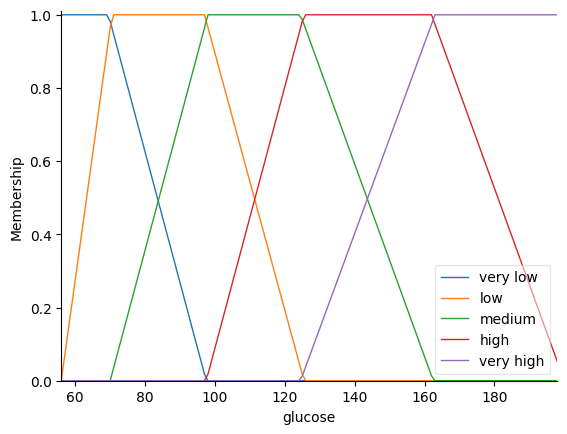

In [89]:
glucose.view()

In [90]:
rule01 = ctrl.Rule(glucose['very low'] | glucose['low'], prediction['no'])
rule02 = ctrl.Rule(glucose['very high'], prediction['yes'])

prediction_ctrl = ctrl.ControlSystem([rule01, rule02])
prediction_inference = ctrl.ControlSystemSimulation(prediction_ctrl)

In [91]:
prediction_inference.input['glucose'] = clean_data_df['Glucose'].to_numpy()

prediction_inference.compute()
result_np = prediction_inference.output['prediction']
# prediction.view(sim=prediction_inference)

In [92]:
output_np = np.where(result_np > 0.5, 1, 0)
gt_np = clean_data_df['Outcome'].to_numpy()
total_sample = gt_np.shape[0]
accurate_sample = (output_np == gt_np).sum()
accuracy = (accurate_sample / total_sample) * 100
print(accurate_sample)
print(accuracy)

288
73.46938775510205
